<a href="https://colab.research.google.com/github/the-internet-princ3/MLDA-/blob/main/knn_updated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import pandas as pd
from google.colab import files

# Function to calculate Euclidean distance
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

# KNN Algorithm
def knn_classify(new_data_point, k, data, features, target):
    distances = []

    # Calculate the Euclidean distance between the new point and all other points
    for idx, row in data.iterrows():
        x = row[features].values
        distance = euclidean_distance(new_data_point, x)
        distances.append((distance, row[target]))

    # Sort distances by ascending order
    distances.sort(key=lambda x: x[0])

    # Take the top k distances (nearest neighbors)
    nearest_neighbors = distances[:k]

    # Get the categories of the nearest neighbors
    categories = [neighbor[1] for neighbor in nearest_neighbors]

    # Count the occurrences of each category
    category_count = Counter(categories)

    # Assign the new data point to the category with the most occurrences
    predicted_category = category_count.most_common(1)[0][0]

    return predicted_category, nearest_neighbors

# Features used for classification
features = ['Duration (hours)', 'Enrolled_Students', 'Completion_Rate (%)', 'Price ($)', 'Rating (out of 5)']
target = 'Category'

# Sample prompt for user input
def get_user_input():
    print("Please enter the new data point values in the following format:")
    print("Duration (hours), Enrolled Students, Completion Rate (%), Price ($), Rating (out of 5)")

    user_input = input("Enter values: ")
    values = list(map(float, user_input.split(',')))

    return np.array(values)

# Graph visualization of new data point
def plot_data(new_data_point, data, features, target, nearest_neighbors):
    plt.figure(figsize=(10, 6))

    # Scatter plot of existing data
    for category in data[target].unique():
        category_data = data[data[target] == category]
        plt.scatter(category_data[features[0]], category_data[features[1]], label=category)

    # Highlight nearest neighbors
    for neighbor in nearest_neighbors:
        plt.scatter(neighbor[0][0], neighbor[0][1], color='yellow', edgecolor='black', s=150, label="Neighbor")

    # Plot the new data point
    plt.scatter(new_data_point[0], new_data_point[1], color='red', edgecolor='black', s=200, label="New Data Point", marker='x')

    plt.xlabel(features[0])
    plt.ylabel(features[1])
    plt.legend()
    plt.show()

# Example usage
if __name__ == "__main__":
    # Upload the dataset manually
    uploaded = files.upload()

    # Load the dataset from the uploaded file (assuming the file is named 'dataset_mla.csv')
    data = pd.read_csv('dataset_mla.csv')  # Ensure the filename matches the uploaded file

    k = 3  # You can adjust the value of k
    new_data_point = get_user_input()

    # Classify the new data point
    predicted_category, nearest_neighbors = knn_classify(new_data_point, k, data, features, target)

    # Display the results
    print(f"The new data point belongs to the category: {predicted_category}")

    # Plot the graph
    plot_data(new_data_point, data, features, target, nearest_neighbors)


Saving dataset mla.csv to dataset mla (1).csv


FileNotFoundError: [Errno 2] No such file or directory: 'dataset_mla.csv'

Saving dataset mla.csv to dataset mla (4).csv
Please enter the new data point values in the following format:
Duration (hours), Enrolled Students, Completion Rate (%), Price ($), Rating (out of 5)
Enter values: 48, 80, 15, 50, 4.5
The new data point belongs to the category: Design


<ipython-input-7-cbae42beb2df>:66: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(new_data_point[0], new_data_point[1], color='red', edgecolor='black', s=200, label="New Data Point", marker='x')


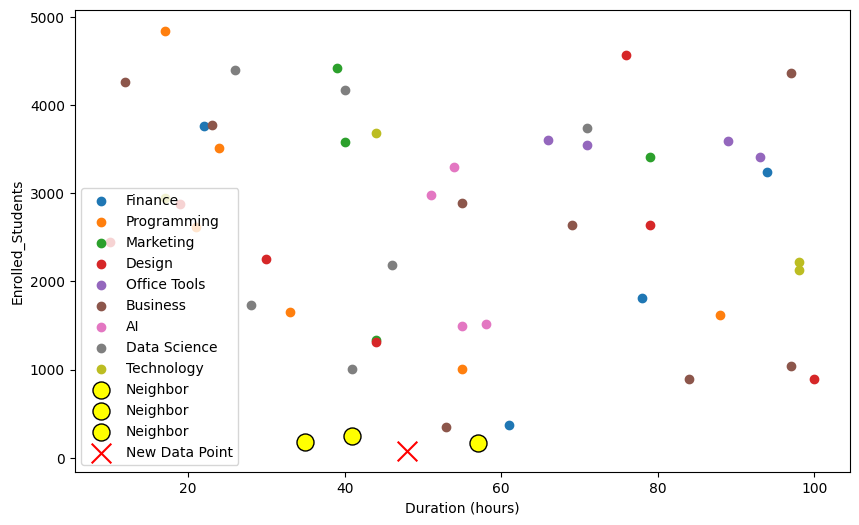

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import pandas as pd
from google.colab import files

# Function to calculate Euclidean distance
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

# KNN Algorithm
def knn_classify(new_data_point, k, data, features, target):
    distances = []

    # Calculate the Euclidean distance between the new point and a random sample of points
    for idx, row in data.iterrows():
        x = row[features].values  # Feature values
        distance = euclidean_distance(new_data_point, x)
        distances.append((distance, x, row[target]))  # Include feature values and target category

    # Sort distances by ascending order
    distances.sort(key=lambda x: x[0])

    # Take the top k distances (nearest neighbors)
    nearest_neighbors = distances[:k]

    # Get the categories of the nearest neighbors
    categories = [neighbor[2] for neighbor in nearest_neighbors]  # Category is at index 2 in the tuple

    # Count the occurrences of each category
    category_count = Counter(categories)

    # Assign the new data point to the category with the most occurrences
    predicted_category = category_count.most_common(1)[0][0]

    return predicted_category, nearest_neighbors

# Features used for classification
features = ['Duration (hours)', 'Enrolled_Students', 'Completion_Rate (%)', 'Price ($)', 'Rating (out of 5)']
target = 'Category'

# Sample prompt for user input
def get_user_input():
    print("Please enter the new data point values in the following format:")
    print("Duration (hours), Enrolled Students, Completion Rate (%), Price ($), Rating (out of 5)")

    user_input = input("Enter values: ")
    values = list(map(float, user_input.split(',')))

    return np.array(values)

# Graph visualization of new data point and random subset
def plot_data(new_data_point, data, features, target, nearest_neighbors, random_sample):
    plt.figure(figsize=(10, 6))

    # Scatter plot of the random sample of data
    for category in random_sample[target].unique():
        category_data = random_sample[random_sample[target] == category]
        plt.scatter(category_data[features[0]], category_data[features[1]], label=category)

    # Highlight nearest neighbors
    for neighbor in nearest_neighbors:
        plt.scatter(neighbor[1][0], neighbor[1][1], color='yellow', edgecolor='black', s=150, label="Neighbor")

    # Plot the new data point
    plt.scatter(new_data_point[0], new_data_point[1], color='red', edgecolor='black', s=200, label="New Data Point", marker='x')

    plt.xlabel(features[0])
    plt.ylabel(features[1])
    plt.legend()
    plt.show()

# Example usage
if __name__ == "__main__":
    # Upload the dataset manually
    uploaded = files.upload()

    # Get the actual filename from the uploaded dictionary
    filename = list(uploaded.keys())[0]

    # Load the dataset using the correct filename
    data = pd.read_csv(filename)

    # Select a random sample of 40-50 data points
    random_sample = data.sample(n=50, random_state=42)

    k = 3  # You can adjust the value of k
    new_data_point = get_user_input()

    # Classify the new data point using the random sample
    predicted_category, nearest_neighbors = knn_classify(new_data_point, k, random_sample, features, target)

    # Display the results
    print(f"The new data point belongs to the category: {predicted_category}")

    # Plot the graph with random sample and nearest neighbors
    plot_data(new_data_point, data, features, target, nearest_neighbors, random_sample)
